<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P(B|G): 0.5007089325501317
P(B|L): 0.3311897106109325


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

0.98%


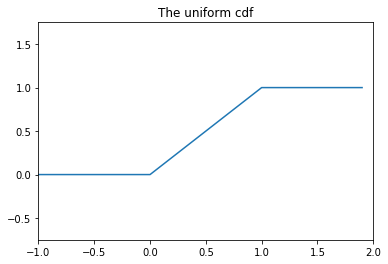

<IPython.core.display.Latex object>

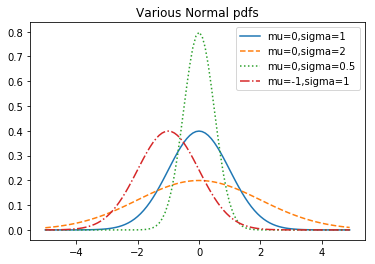

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

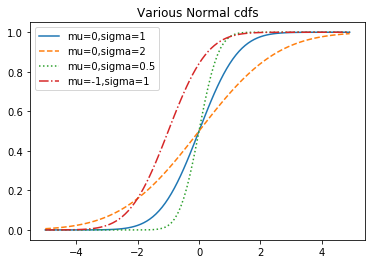

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

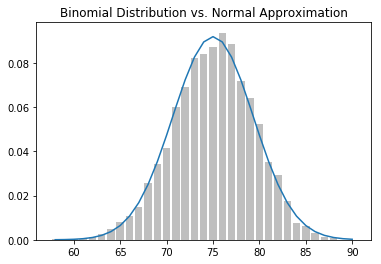

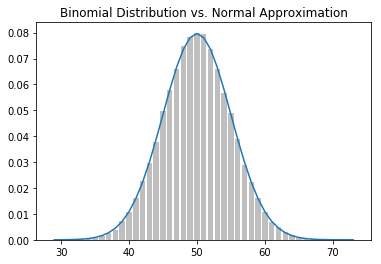

In [20]:
%run '6.Probability.ipynb'

http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Importing%20Notebooks.ipynb

# Hypothesis and Interface

*science*

## Statistical Hypothesis Testing

가설(*hypothesis*):
* "동전이 (던져서 앞뒤 나올 경우가)공정하다"
* "데이터 과학자는 R보다 Python을 선호한다"
* "작고, 찾기 힘든 닫기 버튼을 가진 삽입 광고를 띄우는 페이지는 읽지도 않고 나간다"
* 주장(assertions)
* **데이터 통계치(statistics about data)**

여러 가정(assumptions) 하에,
* 통계치는 어떤 분포의 확률변수에 대한 관측치로 판단될 수 있다
* 가정이 맞는지 판단할 수 있다.

귀무가설(*null hypothesis*, $H_0$); default   
대립가설(alternative hypothesis, $H_1$); 비교할 가설

통계치를 사용해 $H_0$을 기각(reject)할지 말지 결정

## Example: Flipping a Coin

$p$는 동전을 던지면 앞면이 나올 확률   
$H_0$ - 동전은 공정하다, $p=0.5$   
$H_1$ - $p\neq0.5$ 


동전을 $n$번 던져 앞면이 나온 수를 센다; $X$ (환경변수)   
각 동전 던지기는 베르누이 분포를 따른다 = $X$가 이항분포(Binomial(n, p))를 따른다   
이항분포는 정규분포로 근사(approximate)한다

In [4]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

확률변수가 정규분포를 따르면, 확률이 `normal_cdf`로 특정 구간 안(밖)에 있는지 알 수 있다.

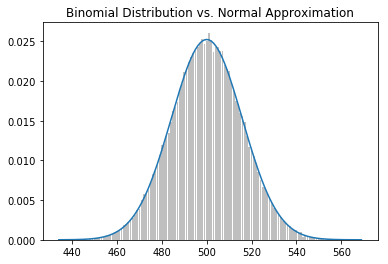

In [21]:
make_hist(0.5, 1000, 100000)

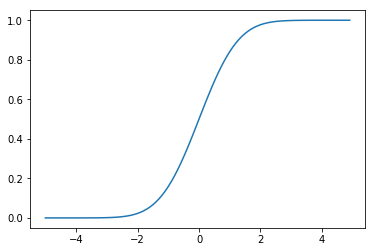

In [23]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.show()

In [6]:
# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_probability_below(lo, mu, sigma)

# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

가운데 구간, 평균 주위의 대칭 구간   
e.g. 평균중심구간 60% = 위/아래 20% 제외한 부분

In [7]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1- probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specific probability"""
    tail_probability = (1 - probability) / 2
    
    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    
    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    
    return lower_bound, upper_bound

동전 $n=1000$번 던지기

In [10]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, .5)
print(mu_0, sigma_0)

500.0 15.811388300841896


유의수준(*significance*); 
* 1종 오류(*type 1 error*)를 얼만큼 만들건가
  + 1종 오류; $H_0$가 참임에도 기각하는 경우
  
5%, 1% ...
**5%**

In [13]:
normal_two_sided_bounds(.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

*가정* $p=0.5$가 맞다면 (=$H_0$이 참);   
*X*가 이 구간 바깥일 확률(469 보다 작거나 531 보다 클 경우)은 5%

이 가설 testing은 20번 중 19번은 옳다

2종 오류(*type 2 error*)를 만들지 않는다 -> *power* of testing   
* 2종 오류; $H_0$가 거짓이지만 기각하지 못하는 오류 (fail to reject even though it's *false*)

$H_0$이 거짓이란 것은($p\neq0.5$)?
* e.g. $p=0.55$, 동전 앞면 나올 확률이 조금 높다 -> power 계산

In [15]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(.95, mu_0, sigma_0)

# actual mu and sigma base on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability
power

0.8865480012953671

$H_0$ - $p\leq0.5$; 동전 앞면 나올 확률이 더 높지 않다   
* *one-sided test* - $X$가 50보다 크면 기각, 작으면 기각 안하는 테스트? ($n=100$일 때 얘기인 듯... 갑자기?)

In [19]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the uppper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability
power

0.9363794803307173

* *two-sided test* 

In [ ]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is what's greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is what's less than x
        return 2 * normal_probability_below(x, mu, sigma)